In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
data_1h = pd.read_csv(r'BTC_USDT_1h.csv')
data_1h["datetime"] = pd.to_datetime(data_1h["timestamp"], unit='ms')
data_1h["datetime"] = data_1h["datetime"].dt.strftime('%Y-%m-%d %H:%M:%S')
data_1h["datetime"] = pd.to_datetime(data_1h["datetime"])
data_1h.set_index("datetime", inplace=True)

data_1d = pd.read_csv(r'BTC_USDT_1d.csv')
data_1d["datetime"] = pd.to_datetime(data_1d["timestamp"], unit='ms')
data_1d["datetime"] = data_1d["datetime"].dt.strftime('%Y-%m-%d %H:%M:%S')
data_1d["datetime"] = pd.to_datetime(data_1d["datetime"])
data_1d.set_index("datetime", inplace=True)

## 缺失值检查

In [3]:
data_1h.isnull().any()

timestamp    False
open         False
high         False
low          False
close        False
volume       False
dtype: bool

In [4]:
data_1d.isnull().any()

timestamp    False
open         False
high         False
low          False
close        False
volume       False
dtype: bool

## 数据框信息

In [5]:
data_1h.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11000 entries, 2024-01-01 00:00:00 to 2025-04-03 07:00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  11000 non-null  int64  
 1   open       11000 non-null  float64
 2   high       11000 non-null  float64
 3   low        11000 non-null  float64
 4   close      11000 non-null  float64
 5   volume     11000 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 601.6 KB


In [6]:
data_1d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 469 entries, 2024-01-01 to 2025-04-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  469 non-null    int64  
 1   open       469 non-null    float64
 2   high       469 non-null    float64
 3   low        469 non-null    float64
 4   close      469 non-null    float64
 5   volume     469 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 25.6 KB


## 重复值检查

In [7]:
data_1h.duplicated().any()

False

In [8]:
data_1d.duplicated().any()

False

In [9]:
data_1h.index.duplicated().any()

False

In [10]:
data_1d.index.duplicated().any()

False

## 描述性统计

In [11]:
data_1h["pct_change"] = data_1h["close"].pct_change()
data_1h.drop(columns=["timestamp"]).describe()

,open,high,low,close,volume,pct_change
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,10999.000000
mean,71400.453259,71643.168048,71141.763984,71403.321258,2.234665,0.000077
std,17423.496659,17483.311474,17357.367717,17420.226827,4.391043,0.005595
min,38789.470000,38879.440000,38570.590000,38800.000000,0.001140,-0.061541
25%,60803.370000,60952.857500,60591.420000,60798.025000,0.271367,-0.002210
50%,66925.610000,67127.195000,66713.060000,66923.625000,0.819335,0.000101
75%,86789.607500,87126.427500,86276.797500,86749.707500,2.364070,0.002473
max,108249.970000,109461.870000,107830.010000,108349.820000,93.292570,0.050039


In [12]:
data_1d["pct_change"] = data_1d["close"].pct_change()
data_1d.drop(columns=["timestamp"]).describe()

,open,high,low,close,volume,pct_change
count,469.000000,469.000000,469.000000,469.000000,469.000000,468.000000
mean,71595.485608,73015.097484,70122.934243,71677.415416,52.867373,0.001776
std,17313.206898,17618.763348,16913.217042,17264.044541,66.493365,0.027662
min,39553.710000,40164.610000,38570.590000,39553.710000,1.714820,-0.085590
25%,60827.480000,62173.950000,59631.640000,60815.460000,18.486430,-0.012581
50%,67160.610000,68203.040000,66000.000000,67173.000000,31.957670,0.000489
75%,86167.260000,88206.130000,83777.700000,86292.760000,54.944500,0.014737
max,106201.710000,109461.870000,105400.000000,106265.060000,447.573300,0.120544


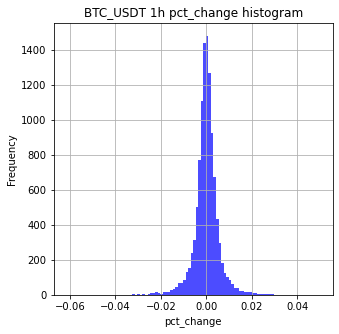

In [13]:
data_1h["pct_change"].hist(bins=100, figsize=(5, 5), grid=True, color="blue", alpha=0.7)
plt.title("BTC_USDT 1h pct_change histogram")
plt.xlabel("pct_change")
plt.ylabel("Frequency")
plt.savefig("BTC_USDT_1h_pct_change_histogram.png")

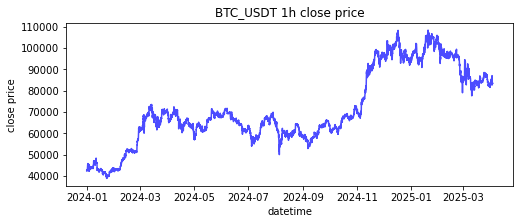

In [14]:
plt.figure(figsize=(8, 3))
plt.plot(data_1h["close"],color="blue", alpha=0.7)
plt.title("BTC_USDT 1h close price")
plt.xlabel("datetime")
plt.ylabel("close price")
plt.savefig("BTC_USDT_1h_close_price.png")

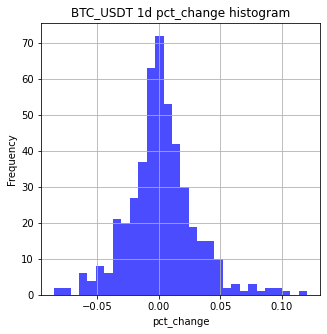

In [15]:
data_1d["pct_change"].hist(bins=30, figsize=(5, 5), grid=True, color="blue", alpha=0.7)
plt.title("BTC_USDT 1d pct_change histogram")
plt.xlabel("pct_change")
plt.ylabel("Frequency")
plt.savefig("BTC_USDT_1d_pct_change_histogram.png")

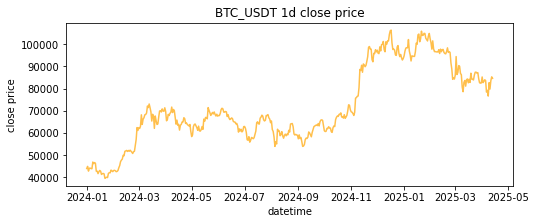

In [19]:
plt.figure(figsize=(8, 3))
plt.plot(data_1d["close"],color="orange", alpha=0.7)
plt.xlabel("datetime")
plt.ylabel("close price")
plt.title("BTC_USDT 1d close price")
plt.savefig("BTC_USDT_1d_close_price.png")

In [18]:
data_1h.reset_index().to_feather("BTC_USDT_1h_processed.feather")
data_1d.reset_index().to_feather("BTC_USDT_1d_processed.feather")